In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
from utils.plotting_utils import *

In [19]:
df = pd.read_csv('../data/german_credit_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

In [20]:
job_dic = {
    0: 'unskilled non res',
    1: 'unskilled resident',
    2: 'skilled',
    3: 'highly skilled'
}
df.job = df.job.map(job_dic)

In [21]:
numerical_features = ['age', 'credit_amount', 'duration']
categorical_features = ['sex', 'job', 'housing', 'saving_accounts', 'checking_account', 'purpose']
target = 'risk'

## Relation between the features and the target variable


### First looking at the categorical ones:

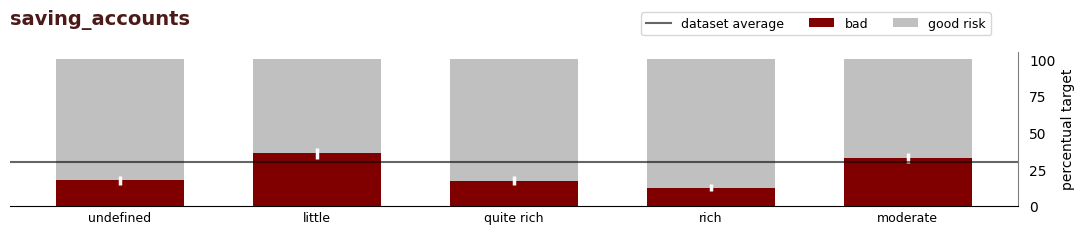

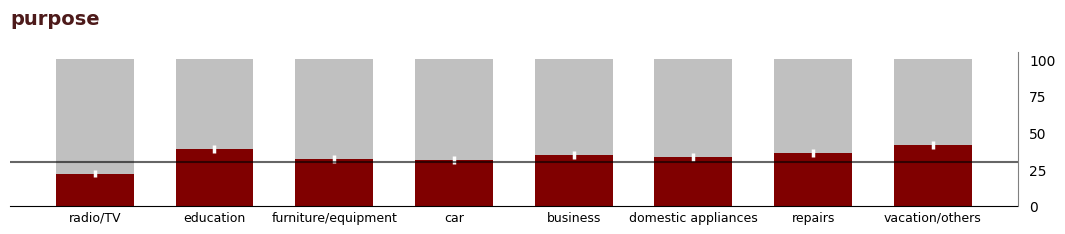

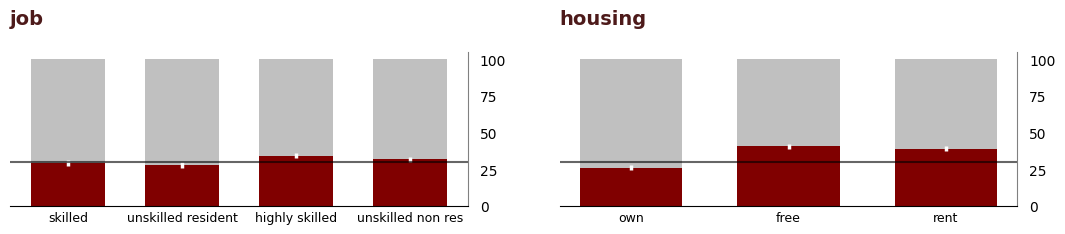

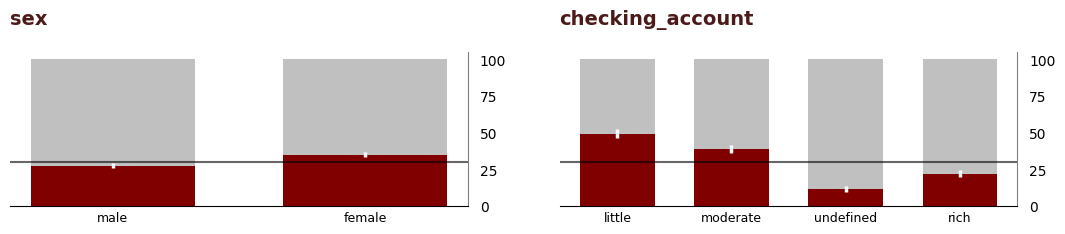

In [22]:
figsize = (13, 2)
plot_stacked_risk(df, 'saving_accounts', figsize = figsize)
plot_stacked_risk(df, 'purpose', figsize = figsize, hide_labels=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = figsize)
plot_stacked_risk(df, 'job', ax = ax1, hide_labels=True)
plot_stacked_risk(df, 'housing', ax = ax2, hide_labels=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = figsize)
plot_stacked_risk(df, 'sex', ax = ax1, hide_labels=True)
plot_stacked_risk(df, 'checking_account', ax = ax2, hide_labels=True)

- Most relations are weak but significant (the uncertainty bars are the white dot looking white on top of the red bars)

- It is notable that the "undefined" (NaNs) are among the biggest relations to the target variable. For this reason we are going to treat them as a class

- Using undefinitions as clases can be risky on a production setup because indefinition sources can change. But let's assume for simplicity this is not the case here

### Numerical features

##### Distributions

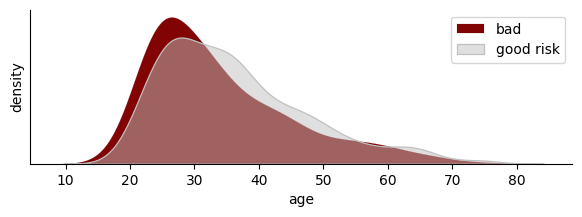

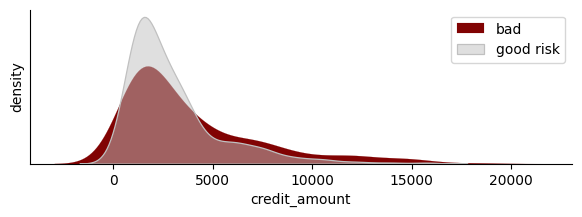

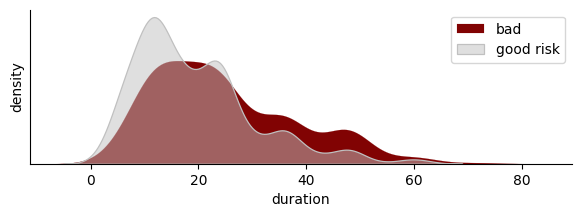

In [24]:
for feature in numerical_features:
    kde(feature, df)

### Second look on numerical features

In order to more easily see the relations, we can treat the numerical features as categorical, by splitting the customers in 4 groups: 
- Each group will be one of the quarters on the feature distribution, so they will have the same number of customers

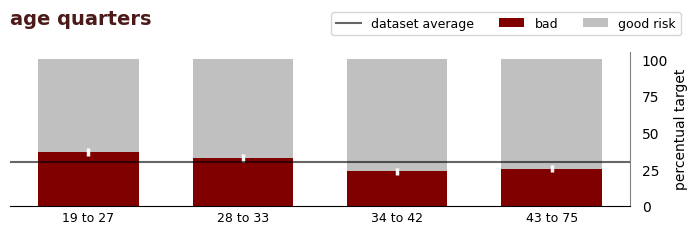

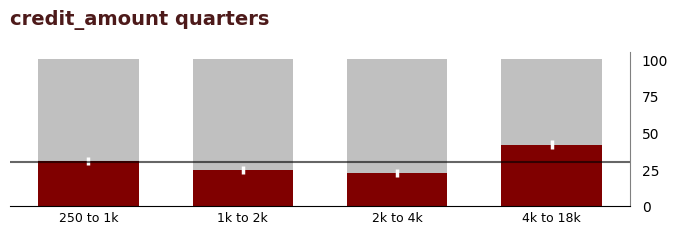

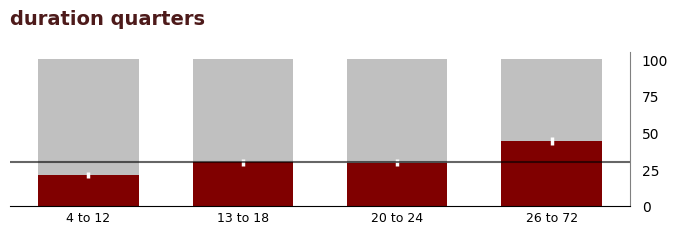

In [23]:
hide_labels = False
for feature in numerical_features:
    plot_stacked_risk(df, feature, is_numerical = True, figsize = (8, 2), hide_labels = hide_labels)
    hide_labels = True

## Relations between features

As this is not my main goal here I won't give this much attention, but giving a general look on the features we can notice:
- Free housing people take higher credit amounts
- Highly skilled people take higher credit amounts
- Higher amount loans usually have longer duration

In [25]:
df.fillna('undefined', inplace=True)
df['target'] = df.risk.map({'good': 0, 'bad': 1})
df.job = df.job.astype(str)

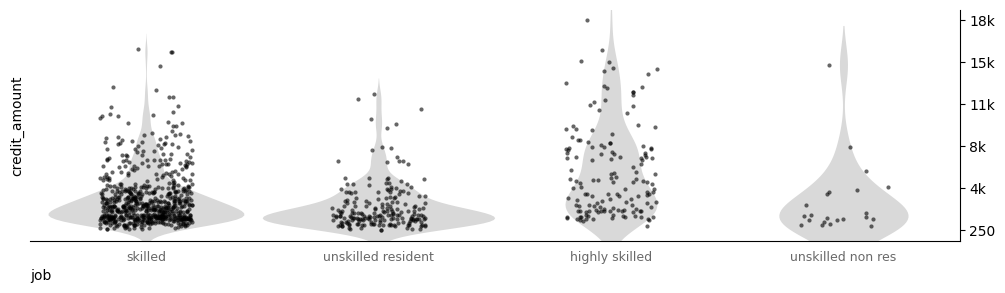

In [26]:
categorical_feature = 'job'
numerical_feature = 'credit_amount'
stripplot(categorical_feature, numerical_feature, df)

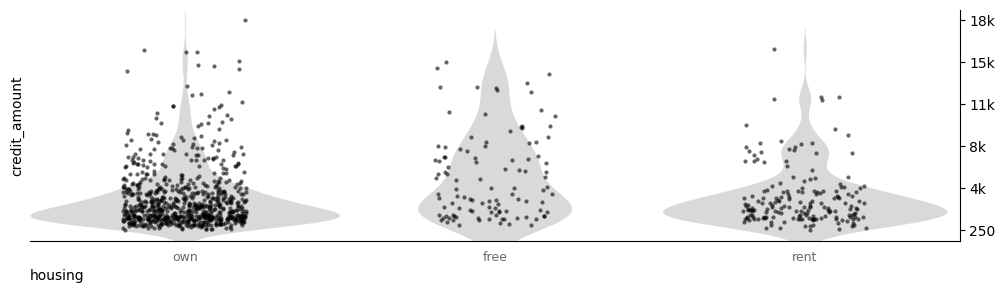

In [27]:
categorical_feature = 'housing'
numerical_feature = 'credit_amount'
stripplot(categorical_feature, numerical_feature, df)

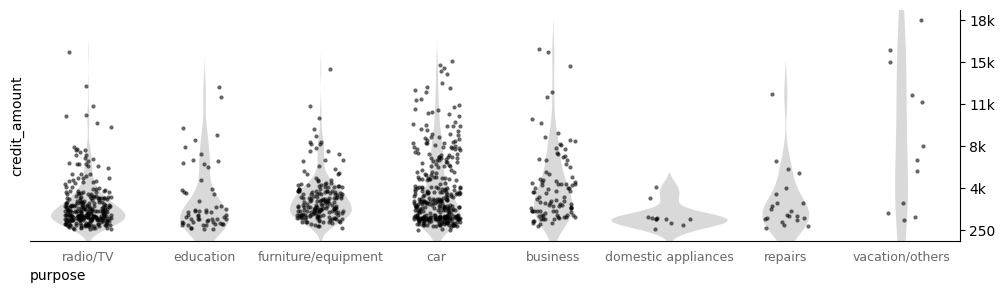

In [45]:
categorical_feature = 'purpose'
numerical_feature = 'credit_amount'
stripplot(categorical_feature, numerical_feature, df)

((0.0, 15000.0), (0.0, 65.0))

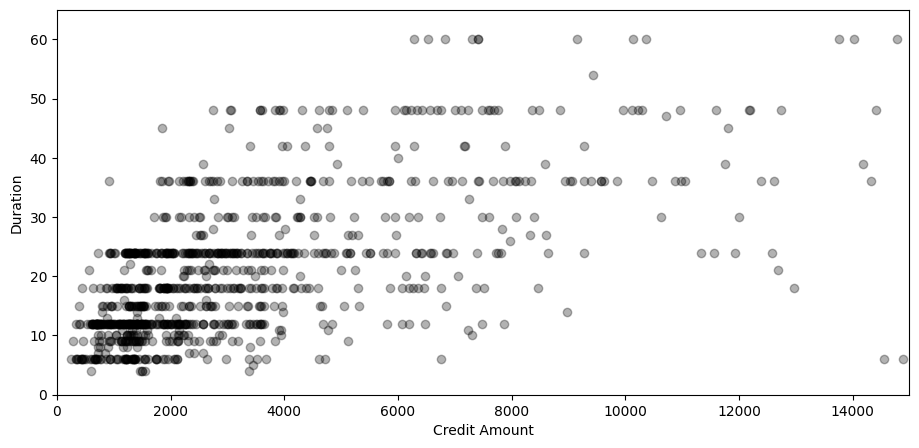

In [50]:
plt.figure(figsize = (11, 5))
plt.scatter(df.credit_amount, df.duration, color = 'black', alpha = 0.3)
plt.xlabel('Credit Amount'), plt.ylabel('Duration')
plt.xlim(0, 15000), plt.ylim(0, 65)